# Text Classification using Tensorflow 2.0
## Yunita Sari

Kita akan menggunakan dataset berupa tweet mengenai sentiment dari airline. 

In [1]:
import pandas as pd
import nltk
import re
import tensorflow as tf
from nltk.tokenize import WordPunctTokenizer
df = pd.read_csv('Tweets.csv')

## Data exploration
**Latihan**: Tambahan eksplorasi yang lain, misal dengan menggunakan wordcloud atau bar graphic untuk mengetahui frekuensi dari kata yang ada di dalam dataset.

In [2]:
df.head(30)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
tweets = df["text"].values
labels = df['airline_sentiment'].values
print (tweets[0:5])

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'
 "@VirginAmerica and it's a really big bad thing about it"]


## Data Cleaning
**Latihan** : Tambahkan step cleaning yang lain, sehingga data lebih mudah diproses

In [4]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet

In [5]:
cleaned_tweets = []
for tweet in tweets:
    cleaned_tweets.append(clean_tweets(str(tweet)))
print(cleaned_tweets[0:5])

['what said', 'plus you ve added commercials to the experience tacky', 'i didn t today must mean i need to take another trip', 'it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse', 'and it s a really big bad thing about it']


## Data Preparation
Pada bagian ini, dimensi data perlu disesuaikan agar sesuai dengan kebutuhan Tensorflow

In [6]:
import numpy as np
len_tweet = []
tok = WordPunctTokenizer()
for tweet in cleaned_tweets:
    len_tweet.append(len(tok.tokenize(tweet)))
print("Panjang maximum twitter:",np.max(len_tweet))


Panjang maximum twitter: 33


### Target diubah ke dalam bentuk numerik

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
print(list(le.classes_))
num_labels = le.transform(labels) 

['negative', 'neutral', 'positive']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_tweets, num_labels, test_size=0.2, random_state=42)
print (len(X_train))

11712


In [9]:
print (len(X_test))

2928


In [10]:
print (set(y_train))

{0, 1, 2}


### Target diubah ke dalam bentuk categorical (binary)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 3)

In [12]:
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os
import random

### Membuat list vocabulary
list vocab hanya boleh di*generate* dari train data

In [14]:
t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(np.array(X_train))

In [15]:
vocab_size = len(t.word_index) + 1
print (vocab_size)
print(t.word_index)

10091
{'to': 1, 'i': 2, 'the': 3, 'a': 4, 'you': 5, 'for': 6, 'flight': 7, 'on': 8, 'and': 9, 'my': 10, 'is': 11, 'in': 12, 'it': 13, 't': 14, 'of': 15, 'me': 16, 'that': 17, 'your': 18, 'can': 19, 'have': 20, 'was': 21, 's': 22, 'not': 23, 'with': 24, 'no': 25, 'at': 26, 'this': 27, 'get': 28, 'we': 29, 'but': 30, 'be': 31, 'from': 32, 'thanks': 33, 'are': 34, 'now': 35, 'cancelled': 36, 'service': 37, 'an': 38, 'just': 39, 'do': 40, 'so': 41, 'been': 42, 'help': 43, 'what': 44, 'time': 45, 'will': 46, 'they': 47, 'm': 48, 'customer': 49, 'up': 50, 'out': 51, 'our': 52, 'us': 53, 'all': 54, 'amp': 55, 'when': 56, 'hours': 57, 'how': 58, 'there': 59, 'hold': 60, 'flights': 61, 'plane': 62, 'if': 63, 'thank': 64, 'why': 65, 'please': 66, 'still': 67, 'would': 68, 'one': 69, 'need': 70, 'am': 71, 'back': 72, 'delayed': 73, 'bag': 74, 'gate': 75, 've': 76, 'call': 77, 'flightled': 78, 'about': 79, 'or': 80, 'had': 81, 'as': 82, 'has': 83, 'hour': 84, 'after': 85, 'don': 86, 'got': 87, 'to

### Tiap kata/token di*convert* ke dalam bentuk indeks

In [16]:
encoded_X_train = t.texts_to_sequences(X_train)

In [17]:
print(encoded_X_train)

[[5, 34, 952, 53, 1600, 6, 135, 333], [194, 447, 206, 11, 336, 3, 238, 247, 724, 38, 173, 24, 642, 30, 13, 21, 4, 1330, 196], [235, 3, 127, 308, 21, 12, 3, 189, 3755, 26, 391, 2, 160, 258, 10, 1109, 1110], [7, 67, 195, 26, 228, 102, 6, 172, 1, 31, 1201], [11, 18, 712, 350, 488, 88, 695, 547, 2289, 1331, 509, 434, 293, 616, 5143, 5144, 3756, 1882, 4], [2055, 57, 8, 60, 3757], [2, 76, 42, 106, 1, 596, 18, 49, 37, 6, 192, 174, 2, 20, 384, 741, 184, 119, 536, 130, 99], [5145, 22, 14, 63, 5, 19, 51, 88, 68, 31, 108, 13, 22, 52, 1739, 9, 27, 129, 5, 83, 250, 4, 5146, 8, 5147], [2, 76, 42, 441, 5, 6, 1332, 174, 9, 25, 69, 2589, 50, 221, 59, 34, 3056, 30, 59, 34, 276, 197, 5148], [44, 22, 122, 8, 26, 2, 76, 42, 195, 26, 3, 75, 6, 134], [129, 11, 2056, 30, 331, 26, 3, 45, 15, 3, 3, 7, 9, 199, 45, 2057], [23, 510, 26, 3, 75, 1601, 51, 10, 7, 32, 583, 1, 1740, 11, 73, 236, 309, 264, 8, 45, 23, 4, 128, 402], [39, 498, 3, 2290, 5, 86, 14, 132, 38, 173], [430, 12, 2058, 3057, 9, 106, 1, 742, 51, 563

In [18]:
encoded_X_test = t.texts_to_sequences(X_test)

In [19]:
print(encoded_X_test)

[[5, 100, 10, 376, 7069, 6, 220, 93, 950], [58, 11, 13, 17, 10, 240, 1, 370, 21, 36, 78, 236, 2368, 1, 447, 32, 541, 34, 67, 115], [44, 11, 122, 8, 24, 18, 1819, 1, 304, 61, 323, 9, 88, 65, 11, 310, 1057, 69, 164, 73], [40, 47, 20, 1, 931, 32, 1401, 203, 328], [2, 19, 827, 254, 193, 15, 148, 34, 3, 153, 22, 8, 59], [67, 102, 1, 549, 72, 10, 2366, 21, 2543, 32, 69, 15, 18, 344, 41, 68, 303, 4, 1717, 138], [165, 10, 7, 21, 281, 2, 48, 39, 871, 1113, 12, 5, 63, 2, 145, 1, 28, 971, 8, 45], [64, 5, 44, 79, 1665, 161, 29, 3906, 394, 32, 59], [23, 221, 937, 10, 153, 2195, 69, 296, 74, 4441, 27, 465, 21, 365, 9, 732, 7807], [108, 179, 6, 7, 484, 1, 2113, 241, 754, 4430, 285, 416], [2, 76, 42, 8, 60, 1, 112, 4, 860, 8, 4, 153, 6, 92, 57, 19, 154, 66, 1049, 16, 398], [2, 139, 203, 5], [214, 1919, 50, 33, 316, 578, 1, 106, 3, 356, 196], [13, 21], [417, 235, 2, 160, 28, 1, 1647, 1509], [7, 200, 224, 8, 62, 12, 568, 212, 11, 3, 6521, 29, 19, 14, 549, 3, 374], [25, 81, 214, 569, 38, 84, 6, 13, 9, 57

### Padding, agar panjang input data sama (max length). Padding akan menambahkan indeks bernilai 0, yang bisa diletakkan di depan atau dibelakang sequence

In [20]:
max_length = 33
padded_X_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_train, maxlen=max_length, padding='post')
print(padded_X_train)

[[  5  34 952 ...   0   0   0]
 [194 447 206 ...   0   0   0]
 [235   3 127 ...   0   0   0]
 ...
 [ 42   8  60 ...   0   0   0]
 [ 29  68  58 ...   0   0   0]
 [ 17  22 315 ...   0   0   0]]


In [21]:
padded_X_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_X_test, maxlen=max_length, padding='post')
print(padded_X_test)

[[  5 100  10 ...   0   0   0]
 [ 58  11  13 ...   0   0   0]
 [ 44  11 122 ...   0   0   0]
 ...
 [  2  48  12 ...   0   0   0]
 [235  29  54 ...   0   0   0]
 [ 66  66  66 ...   0   0   0]]


In [22]:
print(padded_X_train.shape,y_train.shape)

(11712, 33) (11712, 3)


In [23]:
print(padded_X_test.shape,y_test.shape)

(2928, 33) (2928, 3)


## Membuat Model NN
Pada model ini, hanya terdiri dari layer embedding, 1 layer LSTM dan softmax layer 

In [24]:
model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

# Add an RNN layer with 128 internal units.
model.add(layers.SimpleRNN(128))

# Add a Dense layer with 3 units and softmax activation.
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 50)            504550    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               22912     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 527,849
Trainable params: 527,849
Non-trainable params: 0
_________________________________________________________________


## Model di compile

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

### Model di latih pada training data

In [26]:
epochs = 5
batch_size = 64

history = model.fit(padded_X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 10540 samples, validate on 1172 samples
Epoch 1/5
10540/10540 [==============================] - 8s 755us/sample - loss: 0.8301 - accuracy: 0.6538 - val_loss: 0.7667 - val_accuracy: 0.6843
Epoch 2/5
10540/10540 [==============================] - 6s 523us/sample - loss: 0.6122 - accuracy: 0.7589 - val_loss: 0.6807 - val_accuracy: 0.7244
Epoch 3/5
10540/10540 [==============================] - 5s 503us/sample - loss: 0.4830 - accuracy: 0.8151 - val_loss: 0.7023 - val_accuracy: 0.7338
Epoch 4/5
10540/10540 [==============================] - 5s 503us/sample - loss: 0.3780 - accuracy: 0.8592 - val_loss: 0.7428 - val_accuracy: 0.7278
Epoch 5/5
10540/10540 [==============================] - 5s 494us/sample - loss: 0.2805 - accuracy: 0.8958 - val_loss: 0.8960 - val_accuracy: 0.7338


## Model di evaluasi pada test data

In [27]:
accr = model.evaluate(padded_X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2928/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test set
  Loss: 0.789
  Accuracy: 0.761


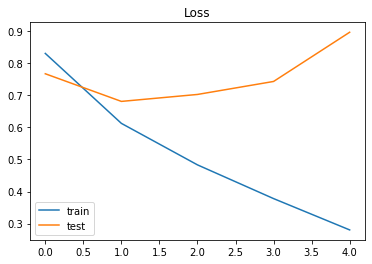

In [28]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


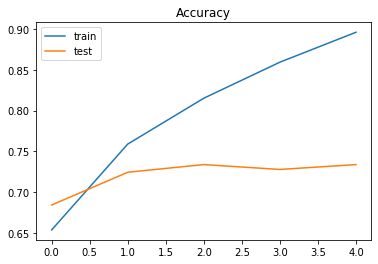

In [32]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [33]:
new_tweet = ['The airlines services really make me sick']
seq = t.texts_to_sequences(new_tweet)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[0.02515951 0.25411388 0.72072655]] 2


## LATIHAN
1. Gunakan word2vec atau pre-trained word embedding
2. Tambahkan dropout layer
3. Evaluasi apakah akurasi dari model bisa bertambah?